# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Vignesh Kumaresan*
Netid:  vk77

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

### a

In [453]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
import random as rd

style.use('ggplot')

class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

In [454]:
# 2 Cluster Centers
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
WCSS_array=np.array([])

for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(1000)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

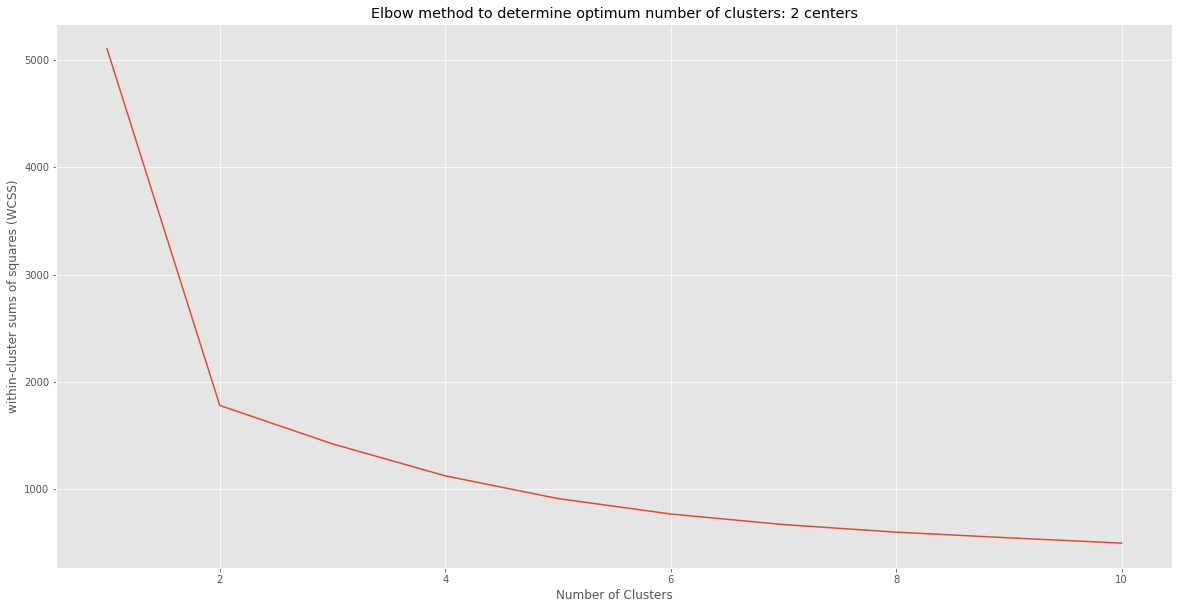

In [455]:
K_array=np.arange(1,11,1)
plt.figure(figsize=(20,10))
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters: 2 centers')
plt.show()

From this plot, we can see that 2 is the optimal number of clusters for this dataset. That is because the 'elbow' in the curve is at 2, meaning that the decrease in the sum of square error starts to lessen in magnitude after this point. 

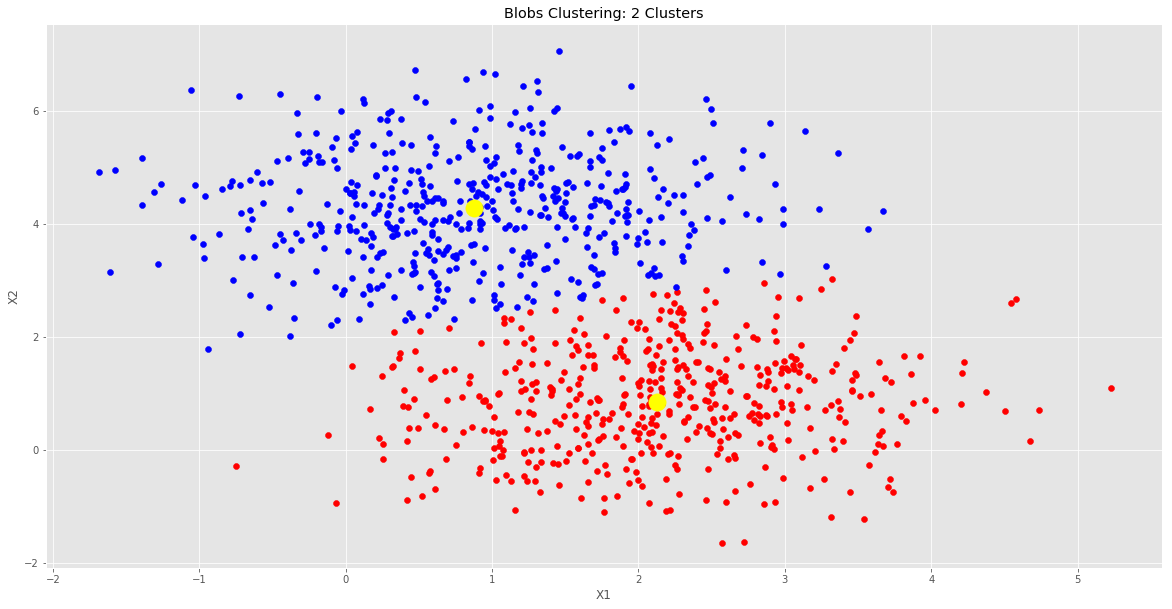

In [458]:
# Plotting starts here
K = 2
kmeans=Kmeans(X,K)
kmeans.fit(1000)
Output,Centroids=kmeans.predict()

plt.figure(figsize=(20,10))
color=['red','blue']
labels=['cluster1','cluster2']

for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])

plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Blobs Clustering: 2 Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

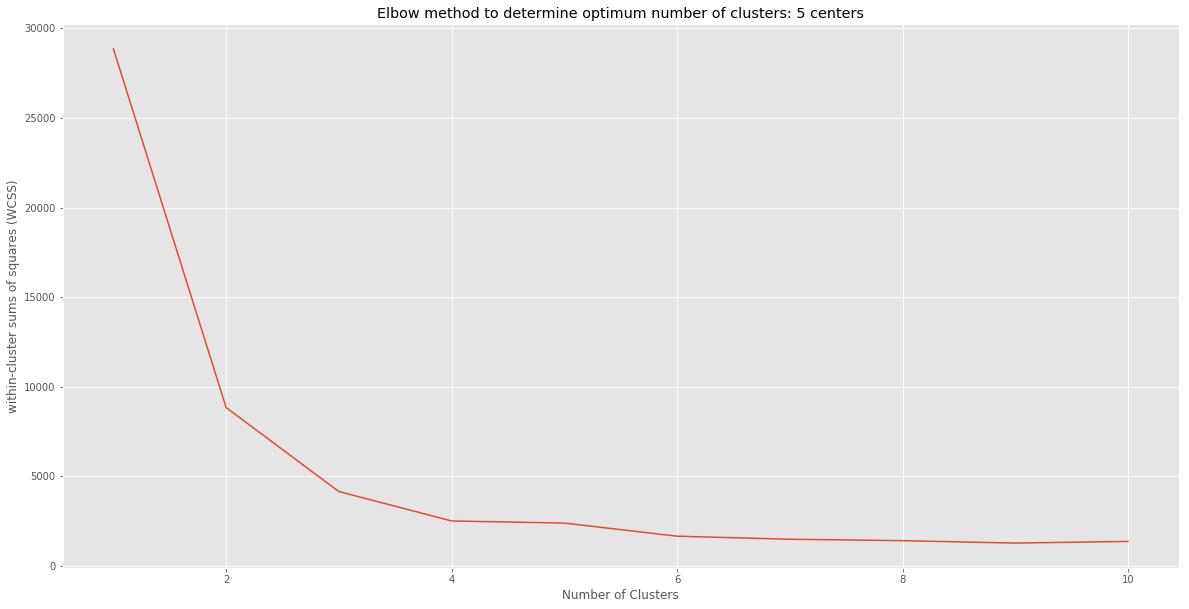

In [461]:
# 5 Cluster Centers
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)

WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(1000)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

K_array=np.arange(1,11,1)
plt.figure(figsize=(20,10))
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters: 5 centers')
plt.show()

From this plot, we can see that 5 is the optimal number of clusters for this dataset. It's a bit harder to see here than in the 2 cluster datset, but the 'elbow' in the curve is at 5, meaning that the decrease in the sum of square error starts to lessen in magnitude after this point.  

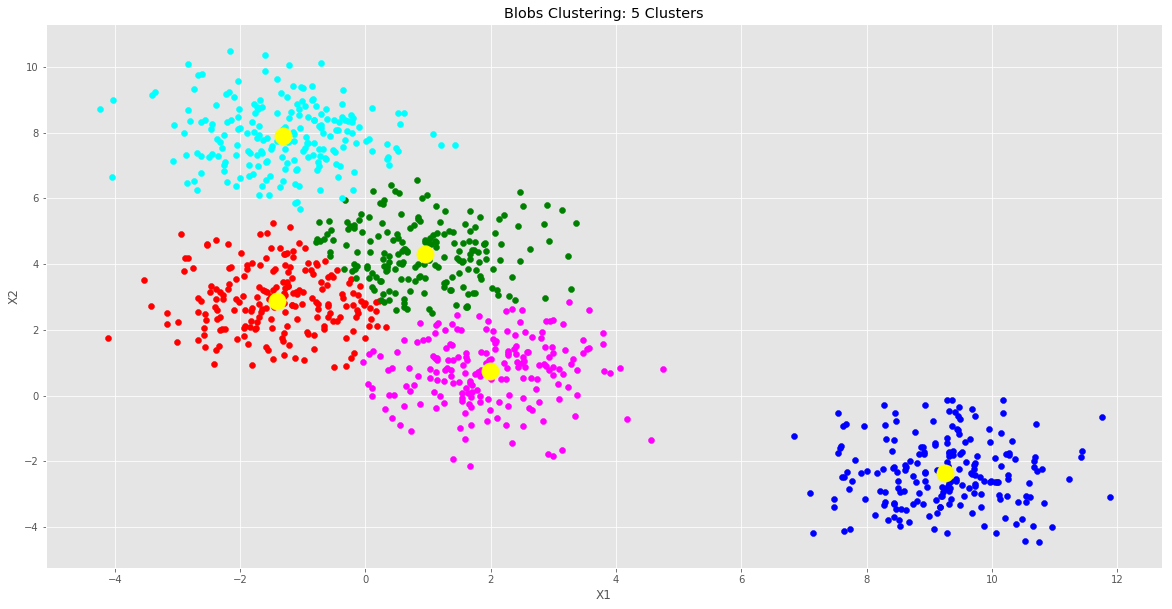

In [462]:
# Plotting starts here
K = 5
kmeans=Kmeans(X,K)
kmeans.fit(1000)
Output,Centroids=kmeans.predict()

plt.figure(figsize = (20,10))
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']

for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Blobs Clustering: 5 Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### b

***k-means***

The k-means algorithm works by computing the Euclidean distance between randomly-initialized centroids and the data, assigning clusters by minimizing this distance in an iterative manner. This random initialization and iteration differentiates this method from other clustering methods. 

***Agglomerative clustering***

The agglomerative clustering approach works by assigning each data point to its own cluster, and then joining similar clusters together in a greedy approach. This is a bottom-up approach, which differentiates itself from other approaches that assign clusters in a forward manner. 

***Gaussian mixture models***

Gaussian mixture models use the same cluster assignment approach as K-means, but is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. This approach can find clusters that are non-regular in shape, which other algorithms might mis-identify. 

***DBSCAN***

DBSCAN uses a density based approach to assign clusters, first forming shapes around datapoints and then grouping nearby datapoints into these shapes to form clusters. This method uses a hyperparameter *epsilon* as the distance between points, so it is better than other clustering methods at not including outliers in the clusters. 

***Spectral clustering***

The spectral clustering algorithm works by creating a graph of the datapoints, computing eigenvectors of the Laplacian matrix, and then running k-means to separate the classes. By projecting the data onto a lower dimension, spectral clustering can often outperform k-means and other clustering algorithms in certain situations. 


### c

In [151]:
# Import data

aggregation = np.loadtxt('/Users/vigneshkumaresan/Desktop/MIDS/Machine Learning/ids705/assignments/data/Aggregation.txt')
compound = np.loadtxt('/Users/vigneshkumaresan/Desktop/MIDS/Machine Learning/ids705/assignments/data/Compound.txt')
d31 = np.loadtxt('/Users/vigneshkumaresan/Desktop/MIDS/Machine Learning/ids705/assignments/data/D31.txt')
jain = np.loadtxt('/Users/vigneshkumaresan/Desktop/MIDS/Machine Learning/ids705/assignments/data/jain.txt')

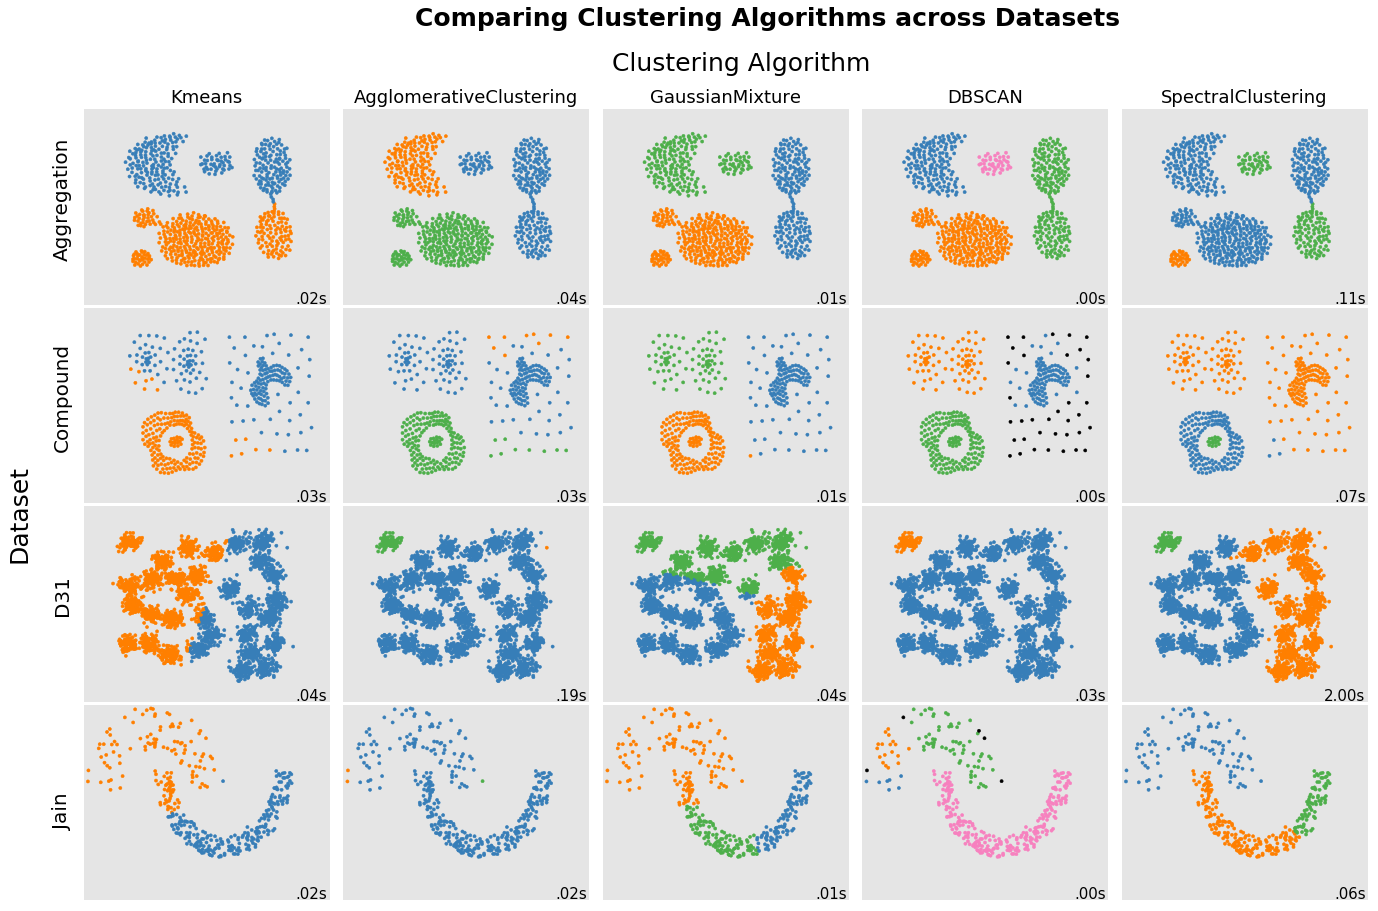

In [543]:
import time
import warnings
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

fig = plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=0.05, right=0.9, bottom=0.02, top=0.9, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [
    (aggregation),
    (compound),
    (d31),
    (jain)]

for i_dataset, (dataset) in enumerate(datasets):
    params = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

    X = dataset[:,0:2]

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
    
    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    kmeans = KMeans(n_clusters=2, random_state=0)
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('Kmeans', kmeans),
        ('AgglomerativeClustering', average_linkage),
        ('GaussianMixture', gmm),
        ('DBSCAN', dbscan),
        ('SpectralClustering', spectral),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

fig.text(0.03, 0.12, 'Jain', va='center', rotation='vertical', fontsize=20)
fig.text(0.03, 0.36, 'D31', va='center', rotation='vertical', fontsize=20)
fig.text(0.03, 0.58, 'Compound', va='center', rotation='vertical', fontsize=20)
fig.text(0.03, 0.80, 'Aggregation', va='center', rotation='vertical', fontsize=20)
fig.text(0.27, 1, 'Comparing Clustering Algorithms across Datasets', va='center', rotation='horizontal', fontsize=25, weight = 1000)
fig.text(0.4, .95, 'Clustering Algorithm', va='center', rotation='horizontal', fontsize=25)
fig.text(0,.45, 'Dataset', va='center', rotation='vertical', fontsize=25)
plt.show()

#### Discussion



In the Aggregation dataset, the Agglomerative Clustering and DBSCAN approaches seems to perform the best. With the other aproaches, they either grouped together different clusters or labeled the same cluster as two different groupings, meaning that they are unable to distinguish correctly. Both Agglomerative Clustering and DBSCAN are good and distinguishing outliers for each cluster, since they both work in a bottom-up manner. 

In the Compound dataset, the Gaussian mixture model seems to perform the best. This dataset is complex, and often the other algorithms included some outliers in each grouping. The Gaussian mixture did this with one point as well (the lower left point in the blue rectangle was labelled as orange), but this was better than in the other methods. Since this dataset contains non-regular shapes, the probabilistic structure of Gaussian mixture modelling performs better than a K-means approach, where the boundaries and number of centroids are fixed. 

In the D31 dataset, Agglomerative Clustering and DBSCAN again perform the best. In this dataset, we seem to have one big cluster and another cluster that is close in distance. While the other algorithms struggle at identifying outliers, Agglomerative Clustering and DBSCAN are able to appropriately distinguish this other cluster as being different from the main cluster. 

In the jain dataset, the KMeans algorithm seems to perform the best. Keep in mind that we had to initialize the algorithm with 2 centers, so if we initialized it with a different number of centers, then we would get a different solution. But ideally, if we were implementing the KMeans approach, we would use the elbow method to find the optimal number of clusters first and then implement the algorithm on the dataset. Here, the data is split relatively cleanly into two clusters of similar shape, so KMeans can place centroids in each group. Other approaches either form too many groups or include everything as one cluster. 

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

### a

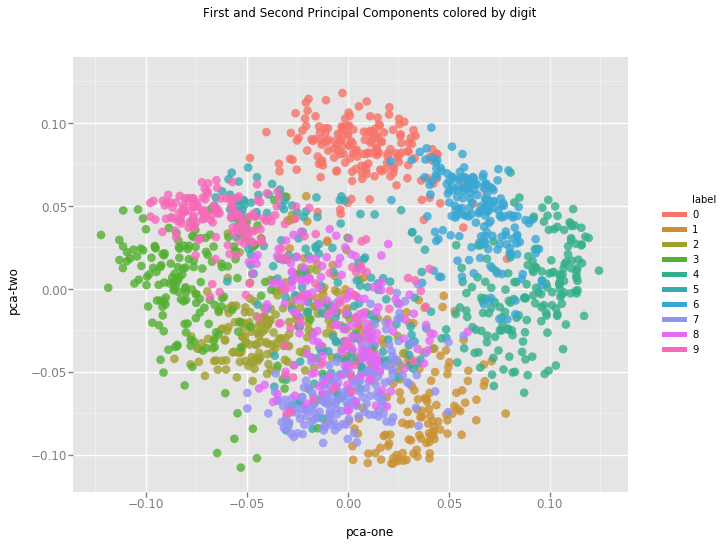

<ggplot: (-9223372029811338359)>

In [253]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

mnist = load_digits()
X = mnist.data / 255.0
y = mnist.target

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

# Plot

from ggplot import *


chart = ggplot( df, aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

### b

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.053456
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.347794
[t-SNE] KL divergence after 300 iterations: 0.787629


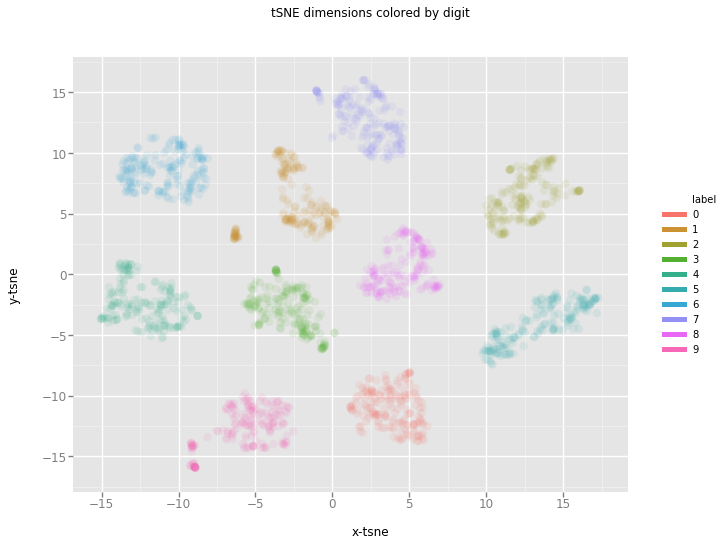

<ggplot: (7016049679)>

In [70]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.values)

df_tsne = df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

### c

Looking at the two plots, it seems that the t-SNE approach seems to cluster the data best. In the PCA plot, we can ascern some label clusters, but others are overlapping each other and thus make it difficult to separate the clusters. Comparatively, in the t-SNE plot, we can see that the clusters are separated out more, making it easier to see the differences in each of the labels. 

**PCA**

*pros*

Able to add new data and plot it in the same dimensional space (in this case, two-dimensional space). 

Works well with different types of datasets, especially when data is linear in nature. 

Able to modify number of components and see direct amount of variance explained. 

*cons*

Does not handle non-linear data well. 

Hard to visualize data (as evidenced by our two-dimensional plot)

Not very computationally efficient. 


**t-SNE**

*pros*

Works well for visualization (as evidenced by our two-dimensional plot)

Works well for non-linear data.


*cons*

As mentioned above, need to re-run algorithm for every addition of new data, so not very scalable or efficient. 

Without cluster labels, different iterations will be hard to track over time, since new representations will be created each time. 

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

### a

5
5
5
5
5
5
5
5
5
5


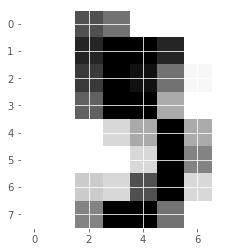

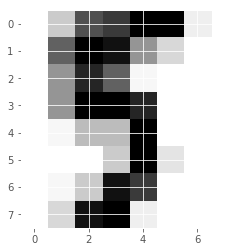

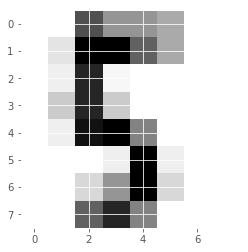

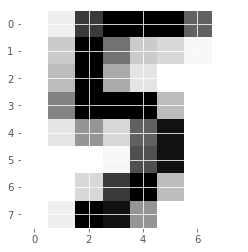

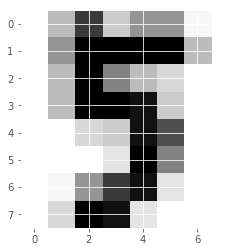

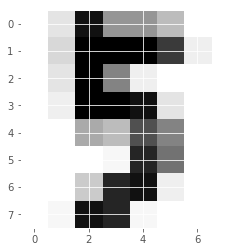

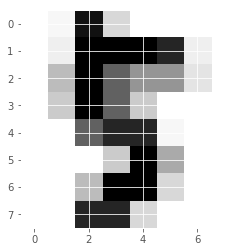

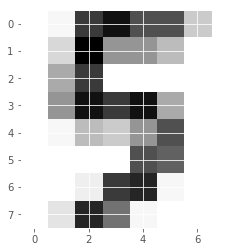

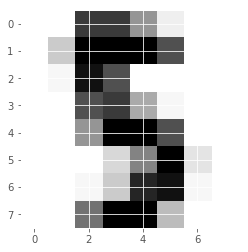

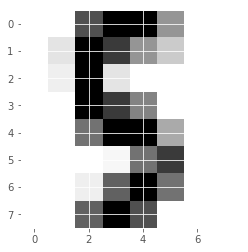

In [324]:
#from mlxtend.data import loadlocal_mnist
#X, y = loadlocal_mnist(
        #images_path='./MNIST/train-images-idx3-ubyte', 
        #labels_path='./MNIST/train-labels-idx1-ubyte')

mnist = load_digits()
X = mnist.data / 255.0
y = mnist.target

# Reshape arrays
X_img = X.reshape(X.shape[0], 8,8)

# extract all 5's
y_5 = y[np.where(y == 5)]
X_5 = X[np.where(y == 5)]

# Plot 10 examples
import matplotlib.pyplot as plt

images_5, = np.where(y == 5)
first_10 = images_5[0:10]

for i in first_10:
    label = y[i]
    print(label)
    plt.figure()
    plt.imshow(X_img[i], cmap='Greys')

### b 

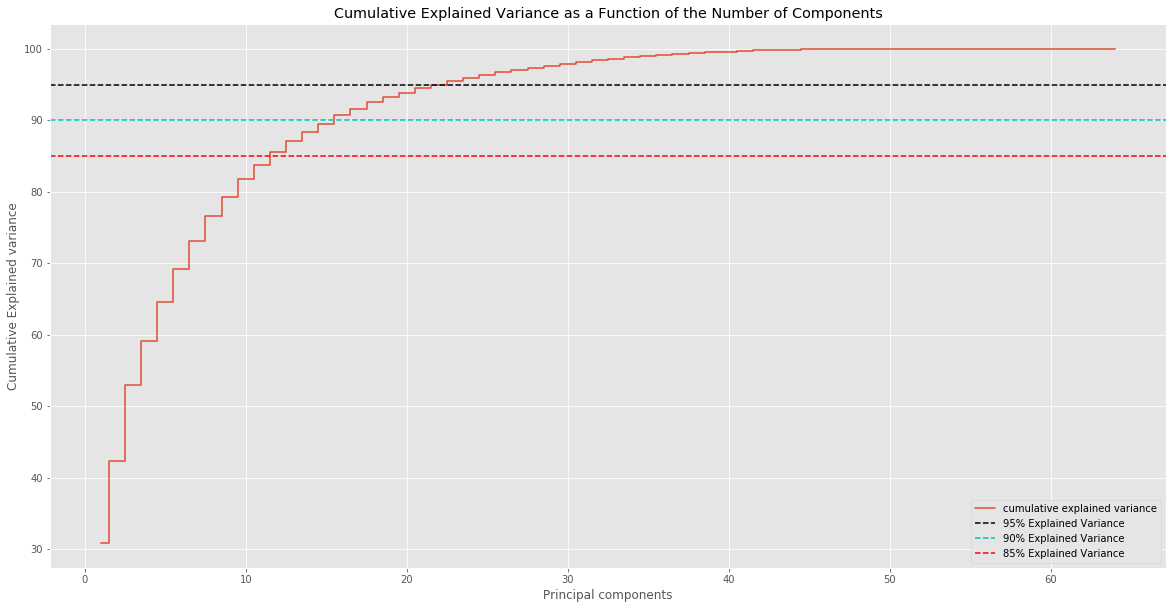

In [544]:
from sklearn.decomposition import PCA

# Initiate PCA
pca = PCA()
pca.fit(X_5, y_5)

# Calculate fraction of variance explained and cumulative sum
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

# Plot
plt.figure(figsize=(20, 10))
plt.step(range(1, 65), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

### c

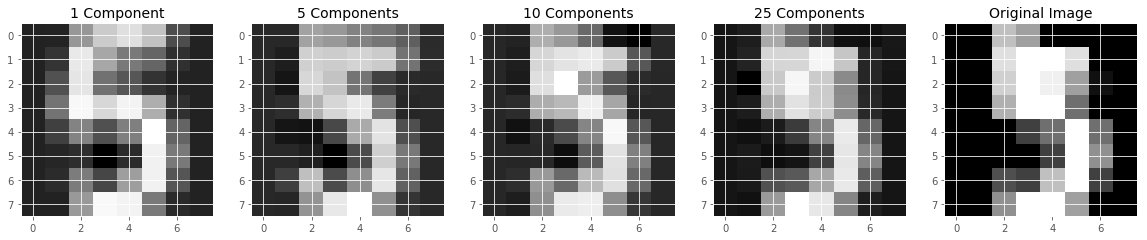

In [539]:
def componentTransformer(k, images): 
    pca = PCA(n_components = k)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

plt.figure(figsize=(20,5));
plt.title("Comparison of Various Principal Components")

# 1 Component
plt.subplot(1, 5, 1);
plt.imshow(componentTransformer(1,X_5)[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('1 Component', fontsize = 14);

# 5 Components
plt.subplot(1, 5, 2);
plt.imshow(componentTransformer(5,X_5)[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('5 Components', fontsize = 14);

# 10 Components
plt.subplot(1, 5, 3);
plt.imshow(componentTransformer(10,X_5)[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('10 Components', fontsize = 14);

# 25 Components
plt.subplot(1, 5, 4);
plt.imshow(componentTransformer(25,X_5)[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('25 Components', fontsize = 14);

# Original Image
plt.subplot(1, 5, 5);
plt.imshow(X_5[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('Original Image', fontsize = 14);

### d

In [337]:
# Total number of components
pca = PCA()
pca.fit(X_5)
pca.n_components_

64

Compression for 1 Component: 0.015625


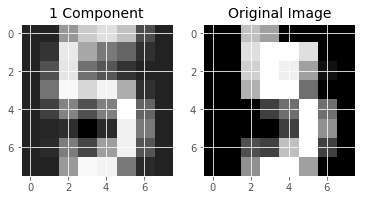

In [535]:
# 1 Principal Component
plt.subplot(1,2,1)
plt.imshow(componentTransformer(1,X_5)[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('1 Component', fontsize = 14);

print("Compression for 1 Component: " + str(1/64))

# Original Image
plt.subplot(1, 2, 2);
plt.imshow(X_5[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('Original Image', fontsize = 14);

**Comments**

With 1 principal component, the image looks quite different from the original image. The image still looks like a '5', but does not have the same features as the '5' in our original image, like the upper line and the closeness of the upper part of the number. 


Compression for 5 Components: 0.078125


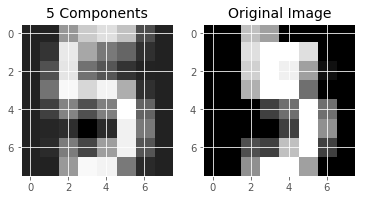

In [536]:
# 5 Principal Components
plt.subplot(1,2,1)
plt.imshow(componentTransformer(1,X_5)[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('5 Components', fontsize = 14);

print("Compression for 5 Components: " + str(5/64))

# Original Image
plt.subplot(1, 2, 2);
plt.imshow(X_5[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('Original Image', fontsize = 14);

**Comments**

The image created from 5 principal components looks pretty similar to the image created from 1 component. It still looks different from the original image, but we do see that the upper part of the '5' is closer to the upper part in the original image, so the compression has improved the approximation a little bit. 

Compression for 10 Components: 0.15625


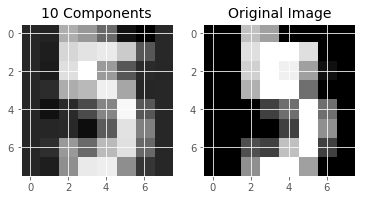

In [537]:
# 10 Principal Components
plt.subplot(1,2,1)
plt.imshow(componentTransformer(10,X_5)[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('10 Components', fontsize = 14);

print("Compression for 10 Components: " + str(10/64))

# Original Image
plt.subplot(1, 2, 2);
plt.imshow(X_5[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('Original Image', fontsize = 14);

**Comments**

With 10 principal components, we start to see an image that is closer to our original image. The upper line starts to come into view, and the proportion of the '5' now starts to better resemble the size of our original image. 

Compression for 25 Components: 0.390625


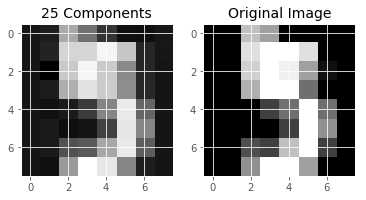

In [538]:
# 25 Principal Components
plt.subplot(1,2,1)
plt.imshow(componentTransformer(25,X_5)[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('25 Components', fontsize = 14);

print("Compression for 25 Components: " + str(25/64))

# Original Image
plt.subplot(1, 2, 2);
plt.imshow(X_5[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
plt.title('Original Image', fontsize = 14);

**Comments**

The image created from 25 components now really approximates our original image, but this is expected since our compression is 0.39. Now, the shape of our recreated image is very similar to the original image, and maintains similar features (ex. the upper line). Additionally, while earlier approximations contained extra white pixels, this recreation has done a better job of filling in the black pixels correctly. 

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

### a

In [470]:
class Neural_Network(object):
    # Set this value to true for print statements
    debug = True
    def __init__(self, input_size, hidden_nodes, output_size, lr):
        # Sets up neural network layers
        np.random.seed(9)
        self.inputLayerSize = input_size      # No. of inputs the neural network takes in
        self.hiddenLayerSize1 = hidden_nodes    # No. of node in hidden layers
        self.hiddenLayerSize2 = hidden_nodes
        self.outputLayerSize = output_size     # No. of outputs of NN
        self.learningRate = lr      # Learning rate

        # Initialize weights to random values
        self.W1 = np.random.randn(self.inputLayerSize+1,self.hiddenLayerSize1)
        self.W2 = np.random.randn(self.hiddenLayerSize1,self.hiddenLayerSize2)
        self.W3 = np.random.randn(self.hiddenLayerSize2,self.outputLayerSize)

    # Feedforward Function
    def feedForward(self, X):
        # Propogate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.sigmoid(self.z3)
        
        self.z4 = np.dot(self.a3,self.W3)
        self.yHat = self.sigmoid(self.z4)
        #self.yHat = np.dot(self.a3,self.W3)
        return self.yHat

    # Activation Function
    def sigmoid(self,z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid prime function
    def sigmoidPrime(self,z):
        return np.multiply((self.sigmoid(z)) , np.subtract(1,self.sigmoid(z)) )

    # Backpropgation Function
    def backProp(self,X,y):
        # Backpropagates error from learned values
        self.yHat = self.feedForward(X)
        # Backpropagates error to weights from the hidden layer
        # to the output
        delta4 = np.multiply((y-self.yHat), self.sigmoidPrime(self.z4))
        djdW3 = np.dot(self.a3.T,delta4)
        self.W3 += djdW3*self.learningRate
        
        delta3 = np.multiply(np.dot(delta4,self.W3.T),self.sigmoidPrime(self.z3))
        djdW2 = np.dot(self.a2.T,delta3)
        #print(djdW2.shape)
        self.W2 += djdW2*self.learningRate

        delta2 = np.multiply(np.dot(delta3,self.W2.T),self.sigmoidPrime(self.z2))
        djdW1 = np.dot(X.T,delta2)
        self.W1 += djdW1*self.learningRate

    # Calculates the error of the neural network
    def errorFunction(self,X,y):
        self.yHat = self.feedForward(X)
        E = 0.5*sum(np.square(y-self.yHat))
        return E

    def costFunctionPrime(self,X,y):
        self.yHat = self.feedForward(X)
        delta = np.multiply((y-self.yHat),self.sigmoidPrime(self.z1))
        djdW1 = np.dot(np.transpose(X),delta)
        return djdW1

### b

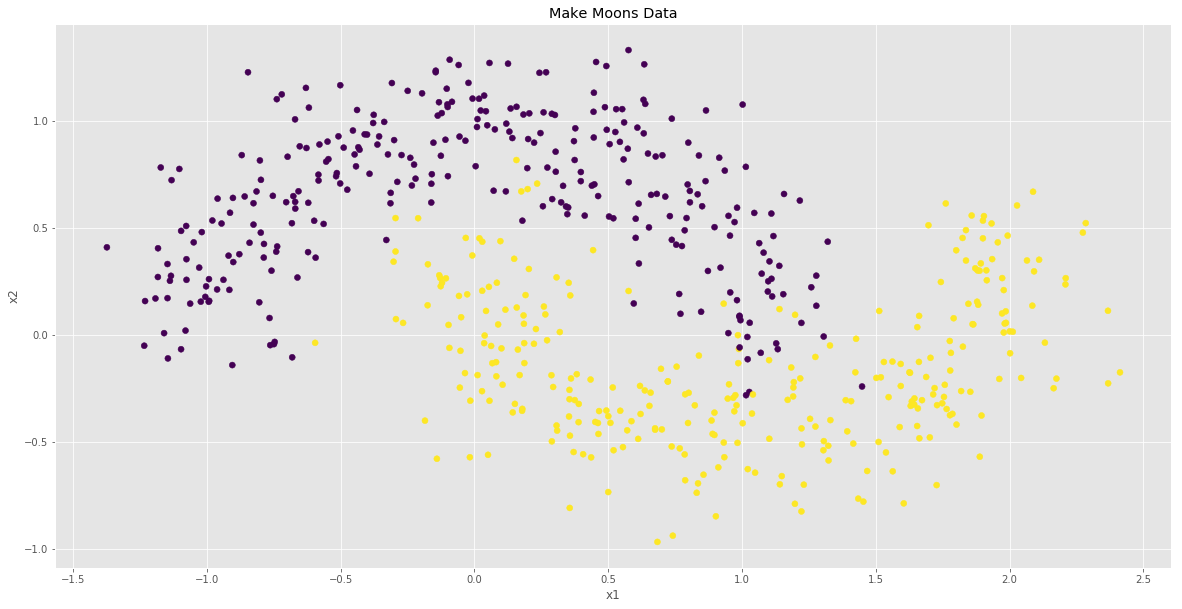

In [510]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=600,noise=0.2)
bias = np.ones((X.shape[0],1))
X = np.hstack((X,bias))
y_ = y
y = y.reshape(-1,1)

XTrain = X[100:]
yTrain = y[100:]

XTest = X[:100]
yTest = y[:100]


plt.figure(figsize = (20,10))
plt.title('Make Moons Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[:,0],X[:,1],c=y.flatten())
plt.show()

In [517]:
NN = Neural_Network(2,5,1,0.1) # learning rate = 0.1

print("-- error before---- ")
print(NN.errorFunction(XTrain,yTrain))
for i in range(3000):
    NN.backProp(XTrain,yTrain)
print("-- error after---- ")

print(NN.errorFunction(XTrain,yTrain))

-- error before---- 
[71.15827582]
-- error after---- 
[6.05773984]


In [518]:
yHat = NN.feedForward(XTrain)
np.sum((yHat-yTrain)**2)

12.115479679945139

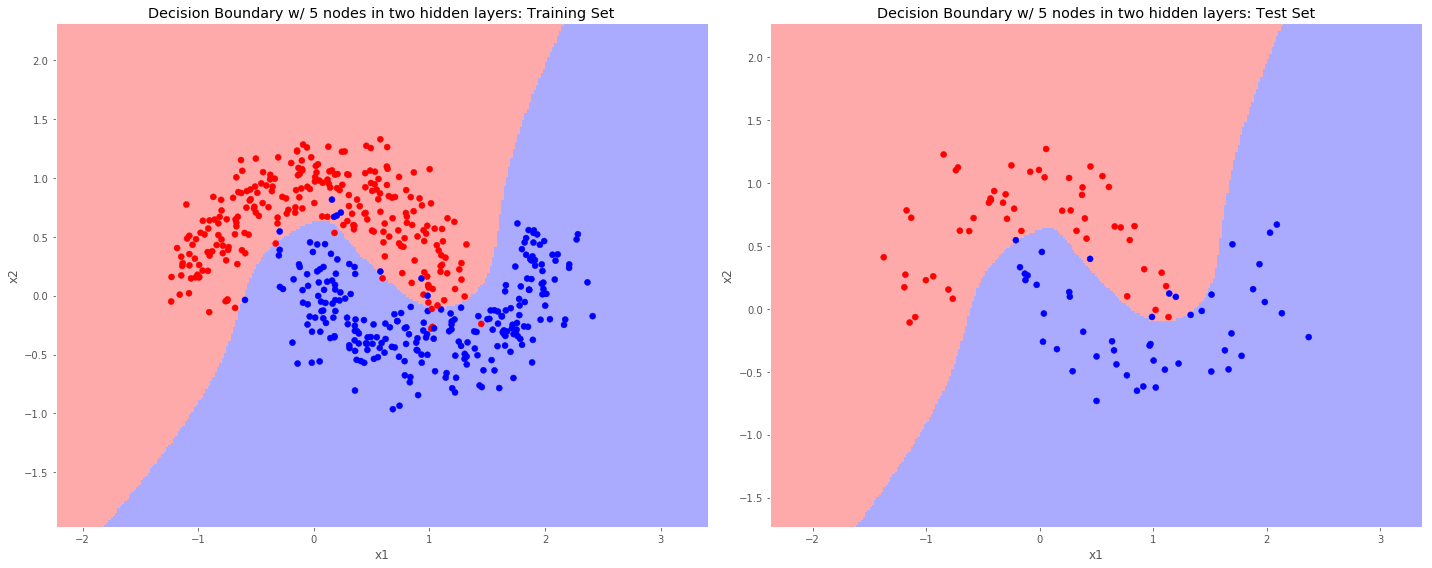

In [531]:
from matplotlib.colors import ListedColormap
def graphDecisionBounds(title):
    plt.subplots(figsize=(20,8))
    
    
    plt.subplot(1,2,1)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    h = 0.02
    xx,yy = np.meshgrid(np.arange(-50,50),np.arange(-50,50))

    X_ = XTrain
    y = yTrain

    x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
    y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    xx_ = np.c_[xx.ravel(), yy.ravel(),np.ones((xx.ravel().shape[0],1))]
    Z = NN.feedForward(xx_)

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    
    plt.scatter(X_[:, 0], X_[:, 1], c=y.flatten(), cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title + ": Training Set")
    plt.xlabel("x1")
    plt.ylabel("x2")
    
    plt.subplot(1,2,2)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    h = 0.02
    xx,yy = np.meshgrid(np.arange(-50,50),np.arange(-50,50))

    X_ = XTest
    y = yTest

    x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
    y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    xx_ = np.c_[xx.ravel(), yy.ravel(),np.ones((xx.ravel().shape[0],1))]
    Z = NN.feedForward(xx_)

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    
    plt.scatter(X_[:, 0], X_[:, 1], c=y.flatten(), cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title + ": Test Set")
    plt.xlabel("x1")
    plt.ylabel("x2")
    
    

graphDecisionBounds("Decision Boundary w/ 5 nodes in two hidden layers")
plt.tight_layout()

### c

1) Adjust number of nodes in hidden layers

By adjusting the number of nodes in our hidden layers, we increase the complexity of our model but also improve its ability to differentiate subtler differences in the data. There are also other hyperparameters that we could modify (learning rate, number of epochs, number of input/output nodes and layers). 

In [533]:
NN = Neural_Network(2,100,1,0.01) # 100 nodes in two hidden layers, learning rate = 0.01

print("-- error before---- ")
print(NN.errorFunction(XTrain,yTrain))
for i in range(3000):
    NN.backProp(XTrain,yTrain)
print("-- error after---- ")

print(NN.errorFunction(XTrain,yTrain))

-- error before---- 
[116.32670303]
-- error after---- 
[5.50776846]


In [529]:
yHat = NN.feedForward(XTest)
np.sum((yHat-yTest)**2)

3.9353271825704184

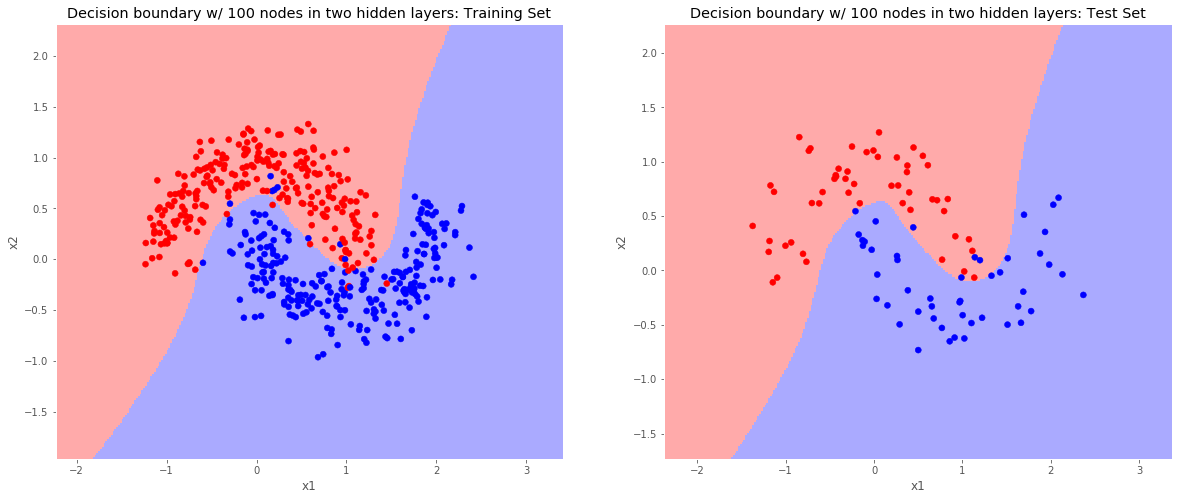

In [532]:
graphDecisionBounds("Decision boundary w/ 100 nodes in two hidden layers")

2) Include regularization parameters in the implementation.

By integrating regularization parameters into our stochastic gradient descent, we can prevent our model from picking weight values that are too large, and thus reduce the risk of overfitting to our data. By adjusting a regularization parameter, we could potentially improve the generalizability and accuracy of our model on the data. 